# Monte Carlo Methods

Import relevant libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm

Initialize variables; these are the settings for the simulation

In [2]:
mu1 = 0.1
mu2 = 0.2
sg1 = 0.05
sg2 = 0.1
dt = 1 / 252
T = 1
L = int(T / dt)
rho = 0.5
S0 = 1

Create the Monte Carlo Simulation. Two random walks are created, both representing stock price paths.

<IPython.core.display.Javascript object>


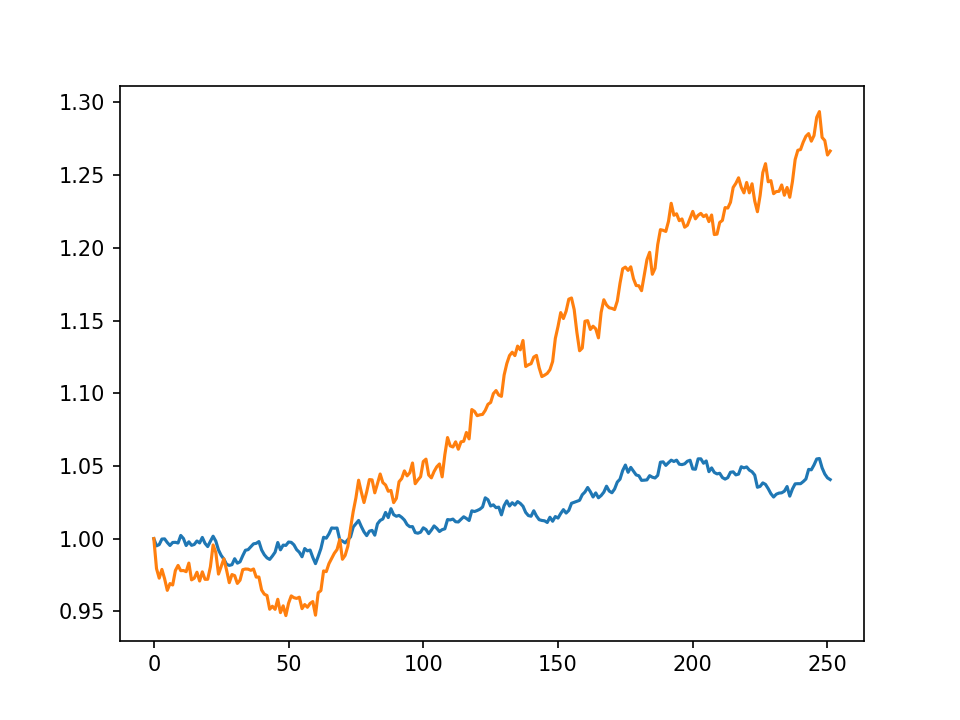

In [5]:
%matplotlib notebook
plt.figure()
S1 = [S0]
S2 = [S0]
eps1 = np.random.normal(size=(L))
e12 = np.random.normal(size=(L))
eps2 = rho * eps1 + np.sqrt(1 - rho ** 2) * e12

for i in range(1, L):
    S1.append(S1[-1] * np.exp((mu1 - 0.5 * sg1 ** 2) * dt + sg1 * eps1[i] * np.sqrt(dt)))
    S2.append(S2[-1] * np.exp((mu2 - 0.5 * sg2 ** 2) * dt + sg2 * eps2[i] * np.sqrt(dt)))
plt.plot(S1)
plt.plot(S2)
plt.show()

In [32]:
R = np.array([[1, 0.4, 0.4], [0.4, 1, 0.2], [-0.4, 0.2, 1]])
X = sqrtm(R) @ np.random.normal(size=(3, int(1e5)))
phi = np.corrcoef(X)

## Antitheic MC simulation, basic idea

The variance (STD) of the antitheic MC is less than half of the basic MC.

In [31]:
f = lambda x: np.exp(x)
x = np.random.normal(size=(100000))
np.mean(f(x)), np.std(f(x)), np.mean((f(x) + f(-x)) / 2), np.std((f(x) + f(-x)) / 2)

(1.6576953653173752, 2.185854857631206, 1.652314838911267, 1.2333841944410784)